In [1]:
import scanpy as sc
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import colors


In [2]:

colors2 = plt.cm.Reds(np.linspace(0, 1, 128))
colors3 = plt.cm.Greys_r(np.linspace(0.7,0.8,20))
colorsComb = np.vstack([colors3, colors2])
mymap = colors.LinearSegmentedColormap.from_list('my_colormap', colorsComb)


In [3]:
colors_v = sc.pl.palettes.vega_20

In [4]:
import scselpy as scS

In [5]:
vedo = sc.read("ECM.h5ad")

In [6]:
ext = ".png"
colors_v = sc.pl.palettes.vega_20
sc.set_figure_params(dpi_save=450,fontsize=13)

plt.rcParams['figure.figsize']=(4,4)

plt.rcParams['axes.grid'] = False

In [7]:
def titlefunc(gene,second=""):
    return("Normalized $"+gene+"$ UMI count per "+second+"cell")


In [8]:
Vedo_Mocks = {'RORC':{'umap':[
[(-5.035611604493876, 15.828114788737519), (-3.518344374691649, 11.373916251190977), (3.593845765006286, 8.931291246729971), (6.723209426473378, 5.7702471233098445), (12.697449143819643, 5.7702471233098445), (13.0767659512702, 15.899956700633432)]
]},

'IFNG':{'umap':[
 
    []

    ]},


'TBX21':{'umap':[
    [(2.361066140791978, 15.828114788737519), (1.981749333341421, 1.387890497659216), (12.981936749407563, 1.244206673867392), (13.171595153132841, 15.899956700633432)]
    ]},
'FOXP3':{'umap':[

    [(-5.4498056323371635, 12.243520021098536), (1.6612729115286253, 9.493216730340215), (1.0482488991264027, 4.555664365829217), (-5.740992038228219, 7.630806627936945)]
    ]}
}

In [9]:
vedo.obs['REMAP_Y'] = ["Other"] * len(vedo.obs)

/home/bioinformatics/anaconda3/envs/scRNA-seq/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


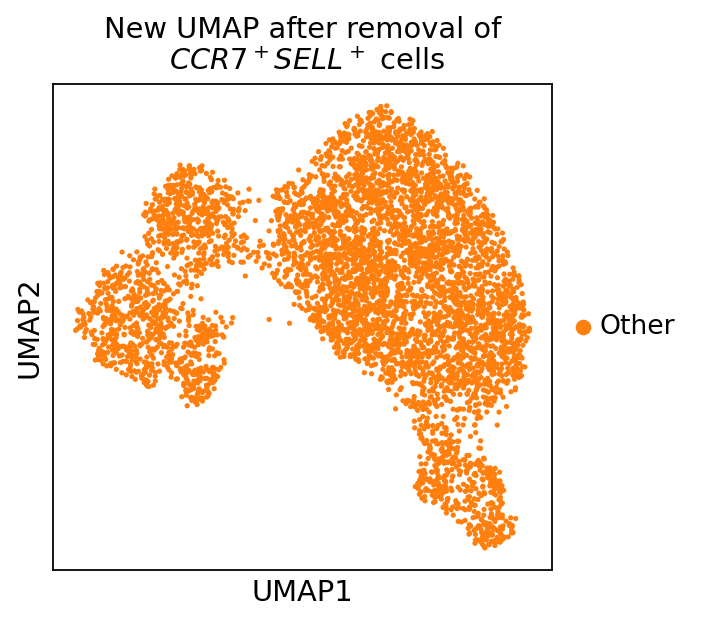

In [10]:
sc.pl.umap(vedo,color='REMAP_Y',title="New UMAP after removal of\n $CCR7^+SELL^+$ cells",palette=[colors_v[2]],save="Figure2_5"+ext)

REMAP_Y was added to anndata.uns.


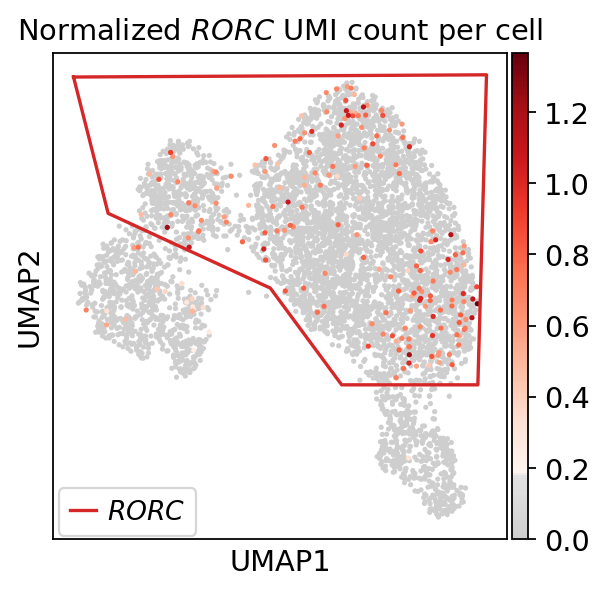

In [11]:
scS.pl.umap(vedo,color=['RORC'],line_handlelength=1,line_loc='lower right',line_bbox_to_anchor=(0.344,-0.02),save="Figure3_1"+ext,title=titlefunc("RORC"),line_labels=['$RORC$'],color_map=mymap,mock=Vedo_Mocks["RORC"],load="REMAP_Y",line_palette=[colors_v[6]])

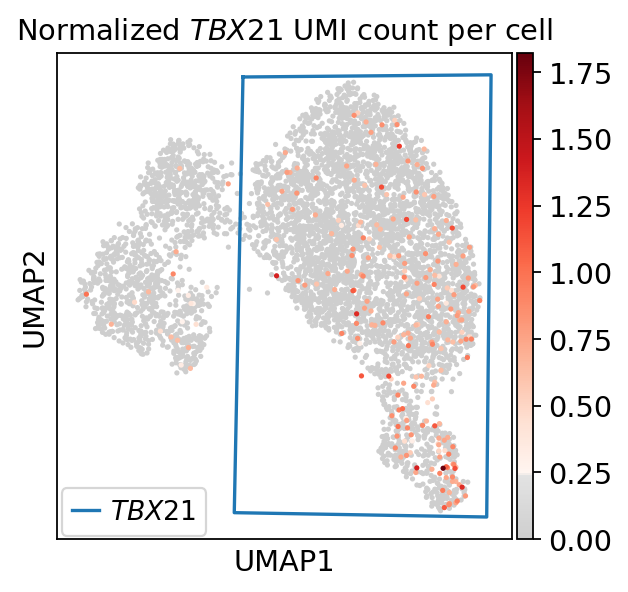

In [12]:
scS.pl.umap(vedo,color=['TBX21'],mock=Vedo_Mocks["TBX21"],line_loc='lower right',line_bbox_to_anchor=(0.357,-0.02),line_labels=['$TBX21$'],line_handlelength=1,save="Figure3_2"+ext,title=titlefunc("TBX21"),color_map=mymap,load="REMAP_Y",line_palette=[colors_v[0]])

In [13]:
Name_with_Gene_Dict = {"1":'$RORC^+$',"2":'$TBX21^+$',"Other":'$RORC^-,TBX21^-$',}
vedo.obs['Annotations'] = scS.annotate.rename(vedo.obs["REMAP_Y"],Name_with_Gene_Dict)
vedo.obs['Annotations'] = ['$RORC^+,TBX21^-$' if repl == '$RORC^+$' else '$TBX21^+,RORC^-$' if repl == '$TBX21^+$' else repl for repl in vedo.obs['Annotations']]

/home/bioinformatics/anaconda3/envs/scRNA-seq/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


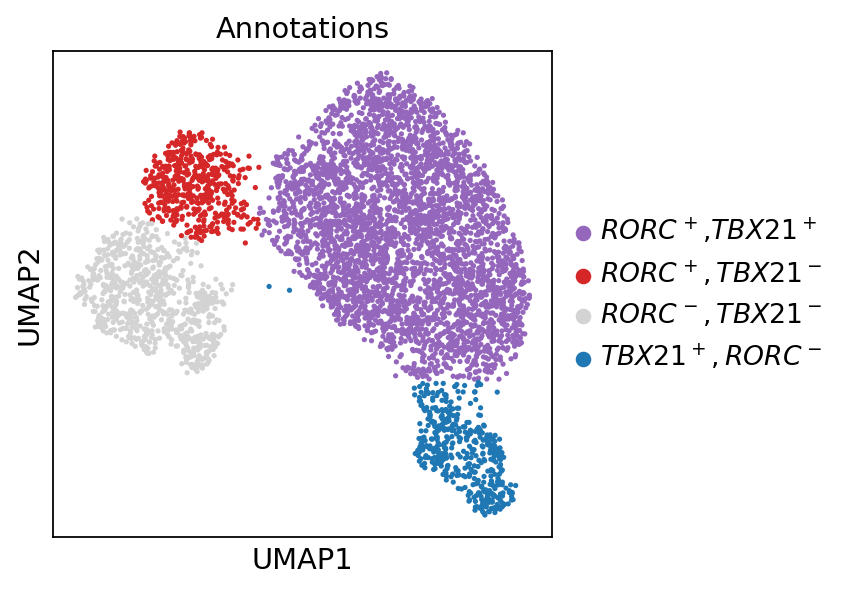

In [14]:
sc.pl.umap(vedo,color=['Annotations'],color_map=mymap,palette=[colors_v[8],colors_v[6],"lightgrey",colors_v[0]],save="Figure3_3"+ext)

/home/bioinformatics/anaconda3/envs/scRNA-seq/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


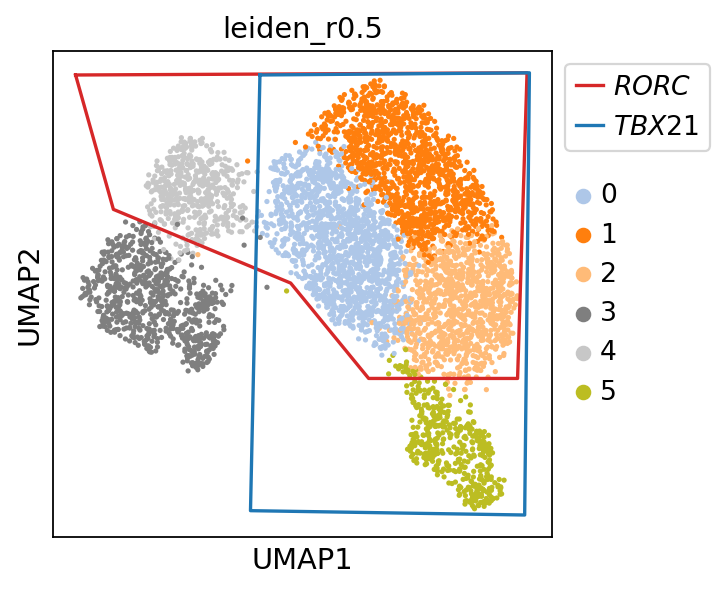

In [15]:
scS.pl.umap(vedo,color="leiden_r0.5",line_palette=[colors_v[6],colors_v[0],colors_v[13]],palette=colors_v[1:4]+colors_v[14:],line_labels=['$RORC$','$TBX21$'], replot_lines="REMAP_Y",line_handlelength=1,save="Figure3_4"+ext)

In [16]:


def Plotting_Barplot(AllDict,obs_inp,gene,gene_list_x_axis_set,ylabelStr,save=None,bbox_to_anchor=None,bbox_to_anchor2=None,color_start=0,TitleStr = None,Legends=True,colors_v=sc.pl.palettes.vega_20,set_ylim=None):
    import matplotlib
    backup_fig_size = plt.rcParams['figure.figsize'].copy()
    plt.rcParams['figure.figsize'] = (4,4)



    fig, ax = plt.subplots()

    ax.grid(visible=False)
    SpaceBetween = 0.1

    SpaceBetween = 1-SpaceBetween 

    barwidth = (SpaceBetween/len(AllDict))

    legend_list = []
    legend_label = []
    for num,Entry in enumerate(AllDict):
        color_int = num + color_start

        add = ((1-SpaceBetween)/2)+(num/len(AllDict))*SpaceBetween

        ax.bar([round(x+add,2) for x in range(len(AllDict[Entry]))],AllDict[Entry],width = barwidth,label = Entry,color=colors_v,edgecolor=colors_v)


    xvalues_of_bars = [xf.get_x() for xf in ax.get_children() if type(xf) == matplotlib.patches.Rectangle]
    value = (xvalues_of_bars[0]+0.5*SpaceBetween)
    if Legends:
        plt.legend(loc=1,bbox_to_anchor=bbox_to_anchor)
    if TitleStr == None:
        try:
            TitleStr = obs_inp+"_vs_"+gene
        except:
            TitleStr = ""
    SecondTS = ""
    

    plt.title(TitleStr+SecondTS,pad=12)
    plt.ylabel(ylabelStr)
    
    

    plt.xticks([x+value for x in range(len(gene_list_x_axis_set))],gene_list_x_axis_set,rotation=20)

    if set_ylim != None:
        ax.set_ylim(set_ylim)
    if save != None:
        plt.savefig(save,bbox_inches='tight')
    plt.show()
    
    plt.rcParams['figure.figsize'] = backup_fig_size
    
def GetBarPlot(adata,obs_inp,gene,save=None,var_inp="var_names",bbox_to_anchor=None,bbox_to_anchor2=None,color_start=0,TitleStr = None,Legends=None,colors_v=sc.pl.palettes.vega_20,set_ylim=None,use_raw=True,layer_key=None,obs_list_x_axis_set=None):
    import scselpy
    AllDict={}
    AllDict[gene] = []
    
    Out = scS.tl.calculate_TPM(adata,obs_inp,gene,which_var=var_inp,use_raw=False,layer_key=layer_key)

    obs_list_x_axis=[]
    ylabelStr = "$"+gene+"$ TPM"
    if obs_list_x_axis_set == None:
        
        for key in Out:
            AllDict[gene].append(Out[key])
            obs_list_x_axis.append(key)
    else:
        
        for key in obs_list_x_axis_set:
            AllDict[gene].append(Out[key])
            obs_list_x_axis.append(key)

    
    
    Plotting_Barplot(AllDict,obs_inp,gene,obs_list_x_axis,ylabelStr,bbox_to_anchor=bbox_to_anchor,bbox_to_anchor2=bbox_to_anchor2,set_ylim=set_ylim,color_start=color_start,TitleStr = TitleStr,Legends=Legends,colors_v=colors_v,save=save)
    
    
    
    
    
    

In [17]:
scS.tl.calculate_TPM

<function scselpy.tools._calculate_stats.calculate_TPM(adata, obs_inp, gene, which_var='var_names', use_raw=True, layer_key=None)>

In [18]:
vedo.obs["Annotations"]

VN_AAACCCAAGATGATTG    $RORC^+$,$TBX21^+$
VN_AAACCCAGTTGACGGA    $RORC^+$,$TBX21^+$
VN_AAACCCATCGTGTCAA      $TBX21^+,RORC^-$
VN_AAACGAAAGAGTCCGA      $RORC^+,TBX21^-$
VN_AAACGCTCACAACGTT    $RORC^+$,$TBX21^+$
                              ...        
VP_TTTGGTTCATCGTTCC    $RORC^+$,$TBX21^+$
VP_TTTGGTTGTACTGACT      $TBX21^+,RORC^-$
VP_TTTGTTGAGGGCCCTT    $RORC^+$,$TBX21^+$
VP_TTTGTTGAGGTTCAGG    $RORC^+$,$TBX21^+$
VP_TTTGTTGCACTAACCA    $RORC^+$,$TBX21^+$
Name: Annotations, Length: 5388, dtype: category
Categories (4, object): ['$RORC^+$,$TBX21^+$', '$RORC^+,TBX21^-$', '$RORC^-,TBX21^-$', '$TBX21^+,RORC^-$']

In [19]:
['$RORC^+,TBX21^-$','$RORC^+$,$TBX21^+$',  '$TBX21^+,RORC^-$','$RORC^-,TBX21^-$']

['$RORC^+,TBX21^-$',
 '$RORC^+$,$TBX21^+$',
 '$TBX21^+,RORC^-$',
 '$RORC^-,TBX21^-$']

{'RORC': [10.04, 8.62, 0.58, 4.71]}
0


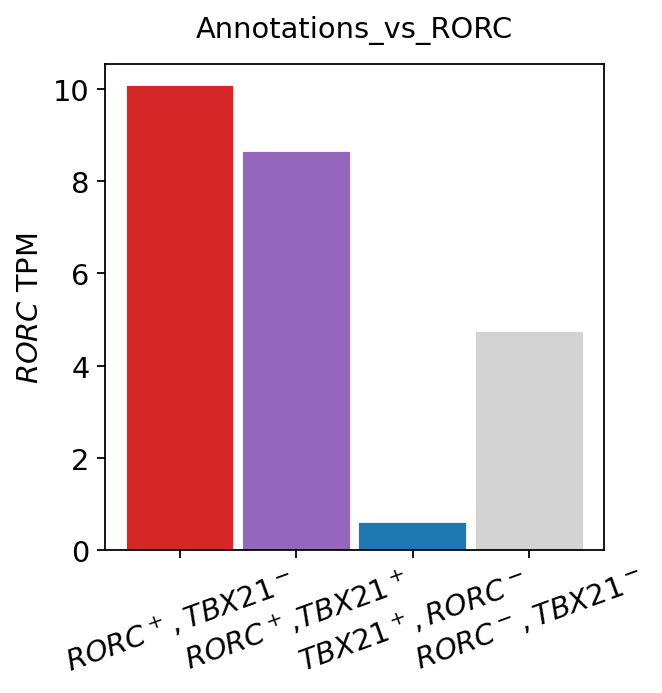

{'TBX21': [0.87, 7.83, 41.5, 4.71]}
0


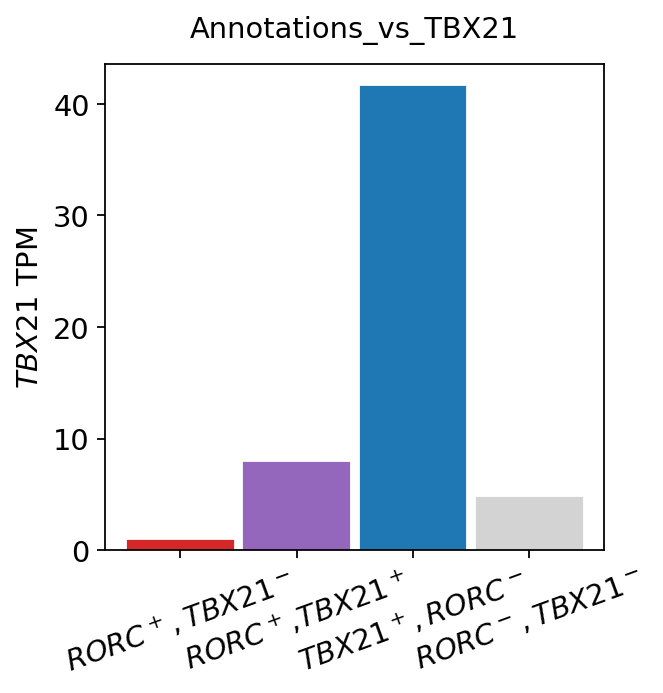

In [20]:
for num,x in enumerate(["RORC","TBX21"]):
    GetBarPlot(vedo,"Annotations",x,save="figures/Figure3_"+str(num+5)+ext,var_inp="var_names", layer_key="counts",obs_list_x_axis_set = ['$RORC^+,TBX21^-$','$RORC^+$,$TBX21^+$',  '$TBX21^+,RORC^-$','$RORC^-,TBX21^-$'],TitleStr = None,Legends=False,colors_v=[colors_v[6],colors_v[8],colors_v[0],"lightgray"])

{'CXCR3': [4.8, 18.03, 44.39]}
0


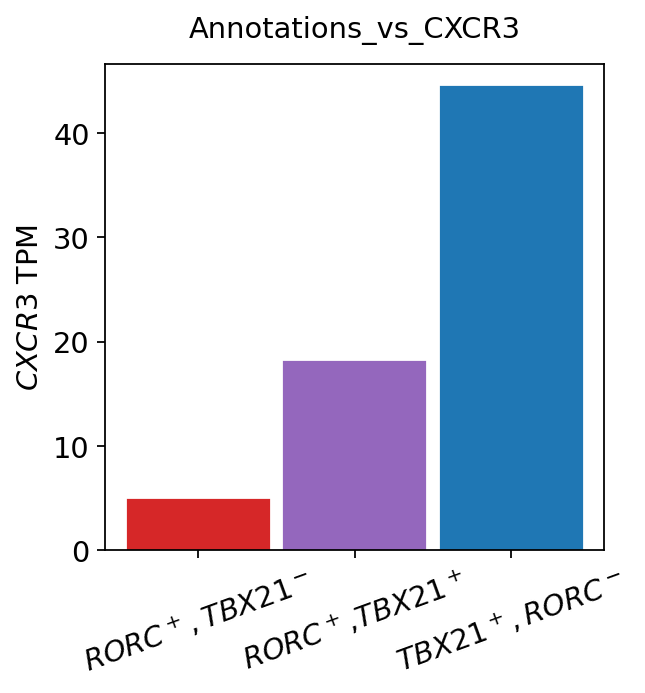

{'CCR6': [100.87, 61.07, 6.34]}
0


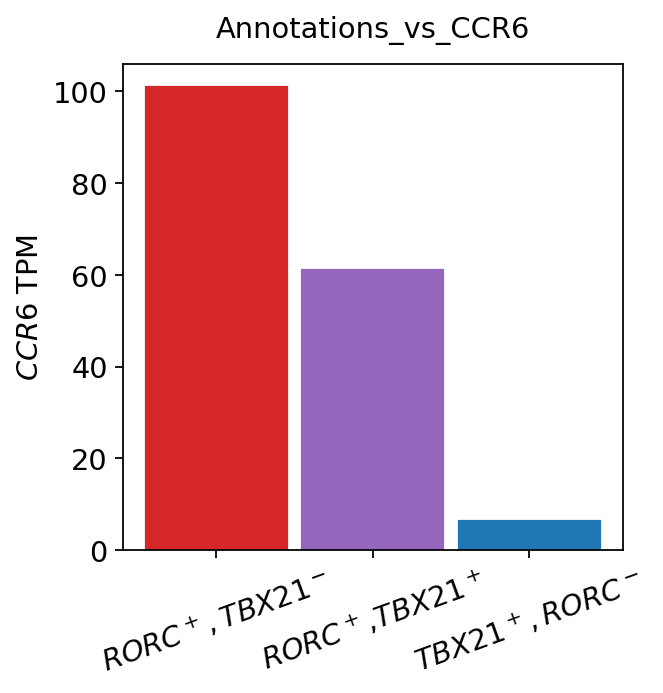

{'CCR4': [64.19, 6.68, 17.29]}
0


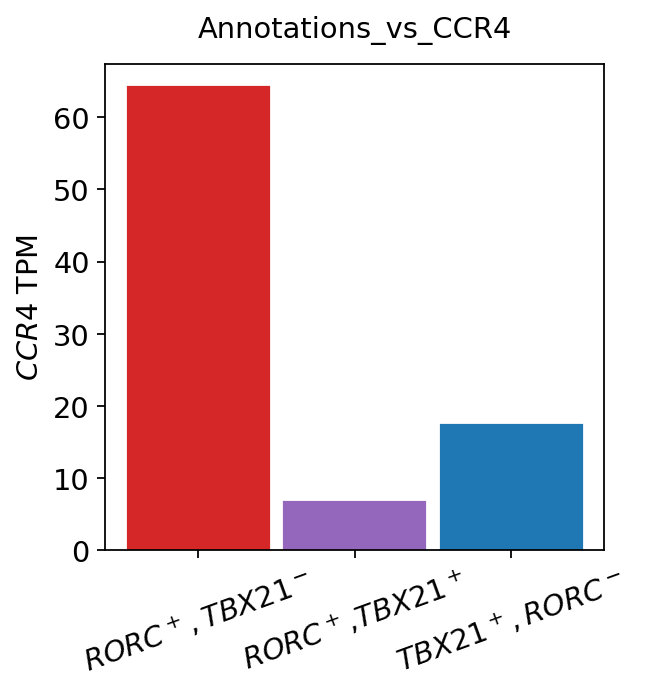

In [21]:
for num,x in enumerate(['CXCR3','CCR6',"CCR4"]):
    GetBarPlot(vedo[vedo.obs['Annotations'] != '$RORC^-,TBX21^-$'],"Annotations",x,layer_key="counts",var_inp="var_names",save="figures/Figure3_"+str(num+7)+ext,obs_list_x_axis_set =['$RORC^+,TBX21^-$','$RORC^+$,$TBX21^+$',  '$TBX21^+,RORC^-$'],colors_v=[colors_v[6],colors_v[8],colors_v[0]],TitleStr = None,Legends=False)

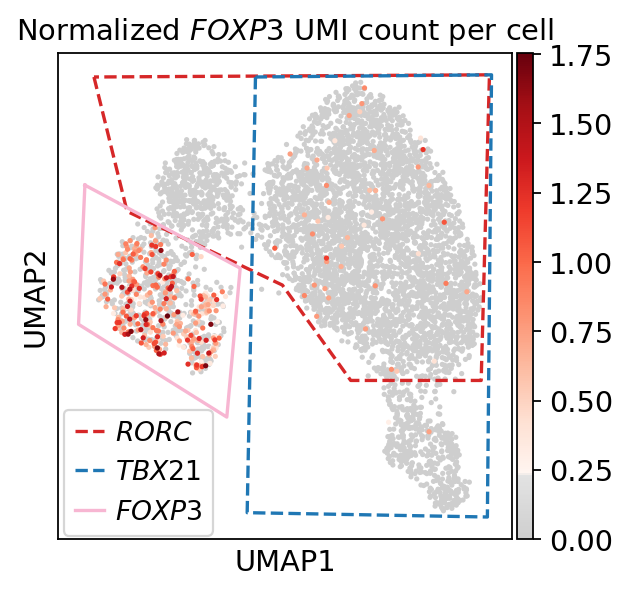

In [22]:
scS.pl.umap(vedo,color='FOXP3',title=titlefunc("FOXP3"),line_palette=[colors_v[6],colors_v[0],colors_v[13],"red","blue","green"],line_handlelength=1.1,color_map=mymap,replot_lines=True,linestyle=["--","--","-","-.","-.","-."],line_labels=['$RORC$', "$TBX21$","$FOXP3$"],load="REMAP_Y",mock=Vedo_Mocks["FOXP3"],line_bbox_to_anchor=(0.37,-0.02),save="Figure4_1"+ext,line_loc="lower right")

In [23]:
vedo_other=vedo[vedo.obs['Annotations'] == '$RORC^-,TBX21^-$']

In [24]:
var_names=["ITGB1","PI16"]

In [25]:
vedo_other.uns['REMAP_FOXP3'] = vedo_other.uns['REMAP_Y'].copy()
del vedo_other.uns['REMAP_FOXP3']['1']
del vedo_other.uns['REMAP_FOXP3']['2']


/home/bioinformatics/anaconda3/envs/scRNA-seq/lib/python3.8/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


/home/bioinformatics/anaconda3/envs/scRNA-seq/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


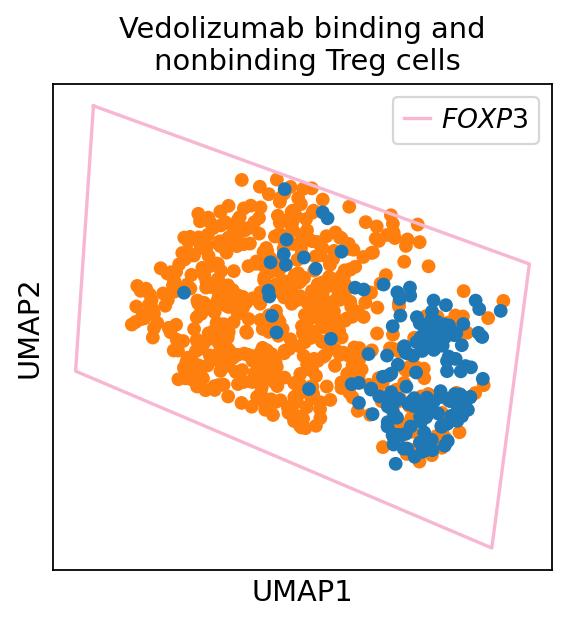

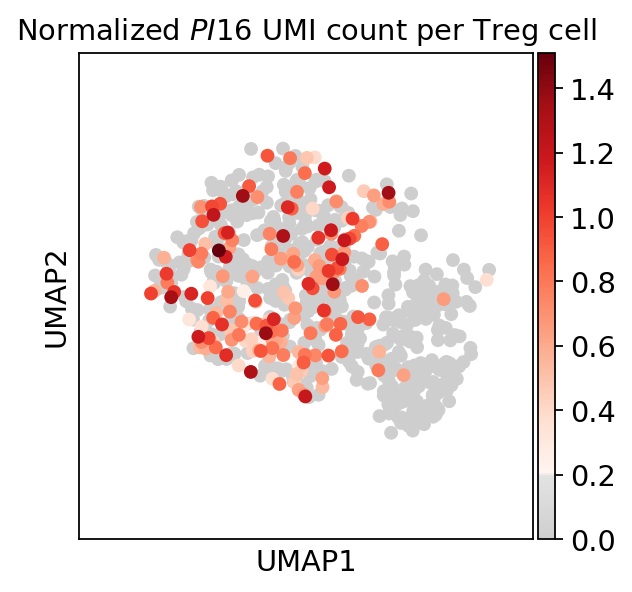

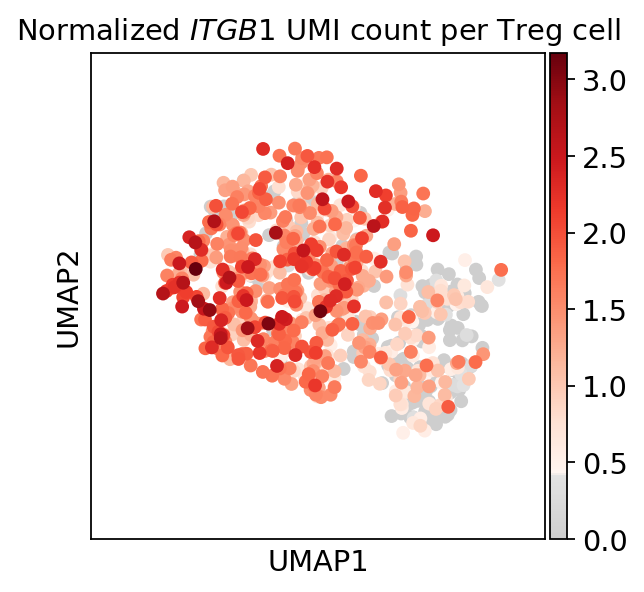

In [26]:
scS.pl.umap(vedo_other,color="sample",color_map=mymap,replot_lines="REMAP_FOXP3",line_palette=[colors_v[13]],line_labels=['$FOXP3$'],palette=[colors_v[2],colors_v[0]],line_handlelength=1,title="Vedolizumab binding and\n nonbinding Treg cells",save="Figure4_3",line_loc='upper right',line_bbox_to_anchor=(1,1))
scS.pl.umap(vedo_other,color=["PI16"],color_map=mymap,replot_lines="REMAP_FOXP3",line_palette=[(1,1,1,0)],title=titlefunc("PI16",second="Treg "),save="Figure4_4")
scS.pl.umap(vedo_other,color=["ITGB1"],color_map=mymap,replot_lines="REMAP_FOXP3",line_palette=[(1,1,1,0)],title=titlefunc("ITGB1",second="Treg "),save="Figure4_5")

/home/bioinformatics/anaconda3/envs/scRNA-seq/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


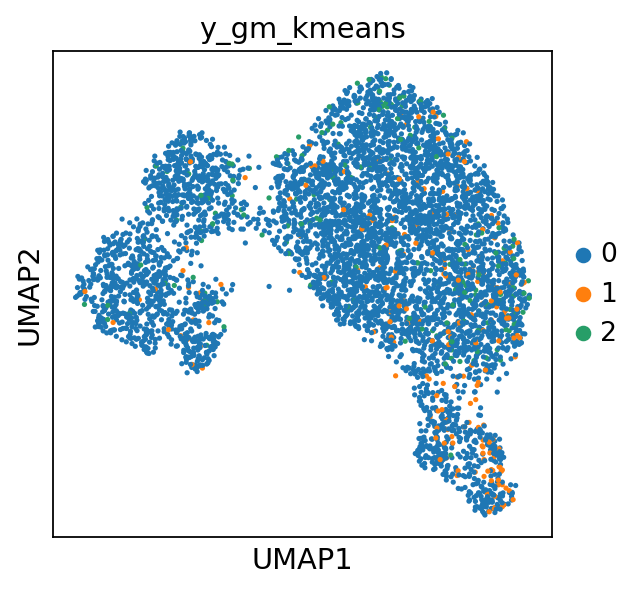

In [27]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture


gm_kmeans = GaussianMixture(n_components=3, 
                            max_iter=1000, 
                            tol=1e-4,
                            init_params='kmeans')
y_gm_kmeans = gm_kmeans.fit_predict(vedo.X[:,[list(vedo.var_names).index("TBX21"),list(vedo.var_names).index("RORC")] ])
vedo.obs["y_gm_kmeans"] = [str(x) for x in y_gm_kmeans]
sc.pl.umap(vedo,color="y_gm_kmeans",save="_FigureS3_2"+ext)

In [28]:
vedo.obs["all"] = ["all"]*len(vedo.obs)

In [29]:
scS.tl.calculate_TPM(vedo,"all","TBX21",layer_key="counts",use_raw=False)

{'all': 8.94}

In [30]:
scS.tl.calculate_TPM(vedo,"all","RORC",layer_key="counts",use_raw=False)

{'all': 7.64}

In [31]:
np.sum(vedo.X)/len(vedo.obs)

1552.4329064587973

In [32]:
   
def GetBarPlot_reverse(adata,obs_inp,gene_list,save=None,var_inp="var_names",bbox_to_anchor=None,bbox_to_anchor2=None,color_start=0,TitleStr = None,Legends=None,colors_v=sc.pl.palettes.vega_20,set_ylim=None,use_raw=True,layer_key=None):
    import scselpy
    gene_list_x_axis_set = gene_list
    AllDict = {obs_inp:[scS.tl.calculate_TPM(adata,obs_inp,gene,which_var=var_inp,use_raw=False)[obs_inp] for gene in gene_list]}
    print(AllDict)
    ylabelStr = "TPM of gene on x-axis"

    
    Plotting_Barplot(AllDict,obs_inp,gene_list,gene_list_x_axis_set,ylabelStr,bbox_to_anchor=bbox_to_anchor,bbox_to_anchor2=bbox_to_anchor2,set_ylim=set_ylim,color_start=color_start,TitleStr = TitleStr,Legends=Legends,colors_v=colors_v,save=save)

{'all': [15.95, 20.14]}
0


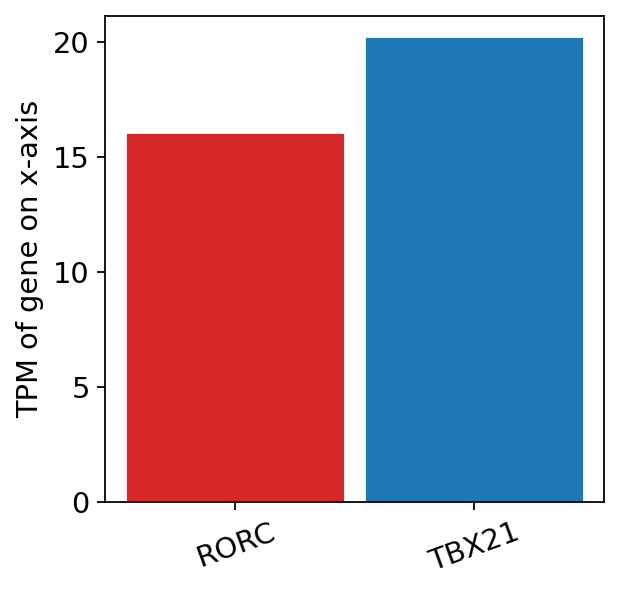

In [33]:
GetBarPlot_reverse(vedo,"all",["RORC","TBX21"],use_raw=False,layer_key="counts",save="figures/FigureS3_4"+ext,colors_v=[colors_v[6],colors_v[0]])